### Check the forces that are being applied when we first raise the mirror. Are these the optimized forces 
We use the optimized forces obtained in the Mirror Lab as optimized forces.

More details on the context of the data
https://jira.lsstcorp.org/secure/Tests.jspa#/testPlayer/testExecution/LVV-E1020

In [1]:
from datetime import datetime, timedelta
import os
import yaml

from astropy.time import Time, TimeDelta
import numpy as np
import pandas as pd
from M1M3tools import *

from lsst_efd_client import EfdClient
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
client = EfdClient('summit_efd')
csc_index = 1
info = {}
info['start_time'] = Time("2020-02-28T18:33:00", scale='utc') 
info['end_time'] = info['start_time'] + timedelta(minutes=2)

In [3]:
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedForces'
df = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
df.head()

,forceMagnitude,fx,fy,fz,mx,my,mz,priority,private_host,private_kafkaStamp,...,zForces90,zForces91,zForces92,zForces93,zForces94,zForces95,zForces96,zForces97,zForces98,zForces99
2020-02-28 18:33:37.005091476+00:00,172622.453125,-9.536743e-07,-504.298401,172621.71875,-662.138672,-634.672363,-0.564822,0,1,1.582915e+09,...,1604.900024,787.160034,1058.600098,1112.199951,1146.299927,1175.699951,585.330017,1081.699951,1092,1130.099976
2020-02-28 18:33:37.028841977+00:00,172622.453125,-9.536743e-07,-504.298401,172621.71875,-662.138672,-634.672363,-0.564822,0,1,1.582915e+09,...,1604.900024,787.160034,1058.600098,1112.199951,1146.299927,1175.699951,585.330017,1081.699951,1092,1130.099976
2020-02-28 18:33:37.068140250+00:00,172622.453125,-9.536743e-07,-504.298401,172621.71875,-662.138672,-634.672363,-0.564822,0,1,1.582915e+09,...,1604.900024,787.160034,1058.600098,1112.199951,1146.299927,1175.699951,585.330017,1081.699951,1092,1130.099976
2020-02-28 18:33:37.140213202+00:00,172622.453125,-9.536743e-07,-504.298401,172621.71875,-662.138672,-634.672363,-0.564822,0,1,1.582915e+09,...,1604.900024,787.160034,1058.600098,1112.199951,1146.299927,1175.699951,585.330017,1081.699951,1092,1130.099976
2020-02-28 18:33:37.172787669+00:00,172622.453125,-9.536743e-07,-504.298401,172621.71875,-662.138672,-634.672363,-0.564822,0,1,1.582915e+09,...,1604.900024,787.160034,1058.600098,1112.199951,1146.299927,1175.699951,585.330017,1081.699951,1092,1130.099976


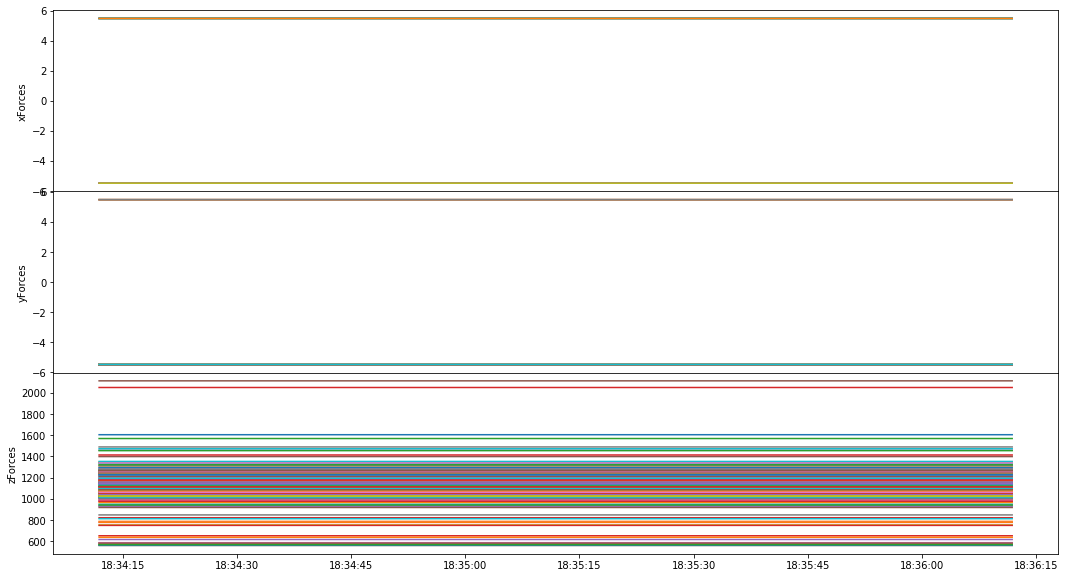

In [4]:
fig, ax = plt.subplots(3,figsize=(18,10), sharex=True)
for i in range(12):
    ax[0].plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['xForces%d'%i])
for i in range(100):
    ax[1].plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['yForces%d'%i])
for i in range(156):
    ax[2].plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['zForces%d'%i])
ax[0].set_ylabel('xForces')
ax[1].set_ylabel('yForces')
ax[2].set_ylabel('zForces')
fig.subplots_adjust(hspace=0)

In [5]:
F = assembleFfromEFD(df)

In [6]:
F

array([[ 101.        ,    0.        ,    0.        ,  580.41998291],
       [ 102.        ,    0.        ,   -5.48150015,  964.05004883],
       [ 103.        ,    0.        ,   -5.48150015, 1046.89990234],
       [ 104.        ,    0.        ,   -5.48150015, 1259.09997559],
       [ 105.        ,    0.        ,   -5.48150015, 1164.80004883],
       [ 106.        ,    0.        ,    0.        , 1398.59997559],
       [ 107.        ,    0.        ,    0.        ,  586.63000488],
       [ 108.        ,    0.        ,   -5.48150015,  931.2300415 ],
       [ 109.        ,    0.        ,   -5.48150015, 1032.09997559],
       [ 110.        ,    0.        ,   -5.48150015, 1218.59997559],
       [ 111.        ,    0.        ,   -5.48150015, 1266.5       ],
       [ 112.        ,    5.48150015,    0.        , 1345.        ],
       [ 113.        ,    0.        ,   -5.48150015, 1568.90002441],
       [ 114.        ,    0.        ,   -5.48150015,  821.77996826],
       [ 115.        ,    0.      

#### check the components of the forces

In [7]:
#await client.get_topics()
#await client.get_fields('lsst.sal.MTM1M3.logevent_appliedBalanceForces')

In [8]:
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedElevationForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
F0 = assembleFfromEFD(df0)
print('max = %.2f, min = %.2f'%(np.max(F0[:,1:]), np.min(F0[:,1:])))

max = 2125.70, min = -5.48


In [9]:
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedAzimuthForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
F0 = assembleFfromEFD(df0)
print('max = %.2f, min = %.2f'%(np.max(F0[:,1:]), np.min(F0[:,1:])))

max = 0.00, min = 0.00


In [10]:
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedThermalForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
F0 = assembleFfromEFD(df0)
print('max = %.2f, min = %.2f'%(np.max(F0[:,1:]), np.min(F0[:,1:])))

max = 0.00, min = 0.00


In [11]:
# we did not enable force balance at that time (not in engineering state)
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedBalanceForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
df0.head()

""


In [12]:
# we were not slewing. Acceleration forces were not enabled
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedAccelerationForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
df0.head()

""


In [13]:
# we were not slewing. Velocity forces were not enabled
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedVelocityForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
df0.head()

""


In [14]:
# we were not slewing. ActiveOptics forces were not enabled
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedActiveOpticsForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
df0.head()

""


In [15]:
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedStaticForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
F0 = assembleFfromEFD(df0)
print('max = %.2f, min = %.2f'%(np.max(F0[:,1:]), np.min(F0[:,1:])))

max = 14.00, min = -20.30


In [16]:
#no aberration forces
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedAberrationForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
df0.head()

""


In [17]:
#no offset forces
info['table_name'] = 'lsst.sal.MTM1M3.logevent_appliedOffsetForces'
df0 = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
df0.head()

""


#### To summarize, when the mirrior is first raised
dominant = MTM1M3_logevent_appliedElevationForces.  LUT vs elevation

0        = MTM1M3_logevent_appliedAzimuthForces.  Azimuth drive imperfection. ~0

0        = MTM1M3_logevent_appliedThermalForces.    Thermal LUT, ~0

nan      = MTM1M3_logevent_appliedBalanceForces        FB system

nan      = MTM1M3_logevent_appliedAccelerationForces.   slew, DC accelerometers

nan      = MTM1M3_logevent_appliedVelocityForces.      Slew, angular velocity, gyro

nan      = MTM1M3_logevent_appliedActiveOpticForces       AOS forces (closed-loop)

small    = MTM1M3_logevent_appliedStaticForces.   Static figure correction

nan      = MTM1M3_logevent_appliedAberrationForces       AOS tests (for injecting aberrations)

nan      = MTM1M3_logevent_appliedOffsetForces         bump test

In [18]:
#seems that we send out logevents at 20 Hz
len(df)/(2*60*20)*100

99.875

### measured forces

In [19]:
info['table_name'] = 'lsst.sal.MTM1M3.forceActuatorData'
dfc = await client.select_time_series(info['table_name'], '*',
                                              info['start_time'].tai, info['end_time'].tai, csc_index)
dfc.head()

,forceMagnitude,fx,fy,fz,mx,my,mz,primaryCylinderForce0,primaryCylinderForce1,primaryCylinderForce10,...,zForce90,zForce91,zForce92,zForce93,zForce94,zForce95,zForce96,zForce97,zForce98,zForce99
2020-02-28 18:33:37.005703297+00:00,172655.765625,0.321649,-502.204529,172655.03125,-660.924805,-636.385498,1.445384,580.888367,969.531372,1271.834595,...,1604.702271,786.817078,1058.417114,1112.219971,1146.251465,1175.609253,585.374146,1081.423584,1092.013672,1130.072998
2020-02-28 18:33:37.047582937+00:00,172653.656250,0.028979,-507.281586,172652.90625,-642.325195,-615.853455,-3.923311,580.953430,969.500366,1271.803101,...,1604.684692,787.022156,1058.526123,1112.290161,1146.334229,1175.583618,585.665100,1081.396118,1092.088623,1130.072998
2020-02-28 18:33:37.047918134+00:00,172657.578125,0.758381,-504.499634,172656.84375,-675.007812,-634.324524,0.239769,581.018555,969.438232,1271.803101,...,1604.754395,787.279358,1058.565186,1112.159302,1146.278687,1175.517944,585.180176,1081.446777,1091.921997,1130.017456
2020-02-28 18:33:37.128698382+00:00,172660.437500,-0.356791,-500.380005,172659.71875,-656.035400,-638.744141,-5.545192,581.148743,969.438232,1271.834595,...,1604.715942,787.219360,1058.557251,1112.177856,1146.380737,1175.697754,585.438782,1081.427856,1092.004028,1130.020630
2020-02-28 18:33:37.153853240+00:00,172653.718750,-1.489626,-508.525940,172652.96875,-669.100342,-629.884827,0.866935,581.311462,969.500366,1271.739990,...,1604.622925,786.962158,1058.463867,1112.028442,1146.208984,1175.694824,585.341797,1081.465576,1091.951050,1129.981567


In [20]:
# telemetry frequency at 20 Hz?
len(dfc)/(2*60*20)*100
fc = assembleFfromEFD_C1C2(dfc)

### commanded forces vs measured forces

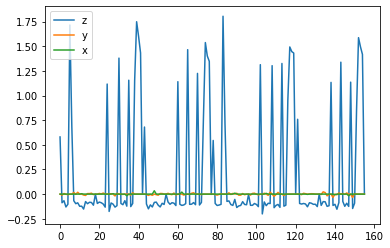

In [21]:
plt.plot(fc[:,3]-F[:,3], label='z')
plt.plot(fc[:,2]-F[:,2], label='y')
plt.plot(fc[:,1]-F[:,1], label='x')
plt.legend();

### compare to optimized forces

In [22]:
with open('data/FLUT.yaml', "r") as yamlFile:
    aa = yaml.safe_load(yamlFile)
flut = np.array(aa)
fo = flut[0,:,:]

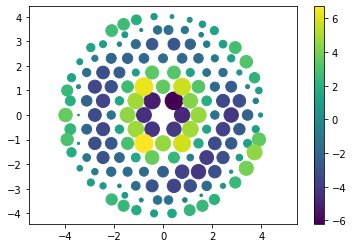

In [27]:
fzd = F[:,3] - fo[:,3]
plt.scatter(xact, yact, abs(fzd)*5e1, fzd)
plt.colorbar()
plt.axis('equal');
#plt.plot(fzd)

In [28]:
dr = pd.read_csv('data/ElevationZTable.csv')
fzd = F[:,3] - dr['Coefficient 0']

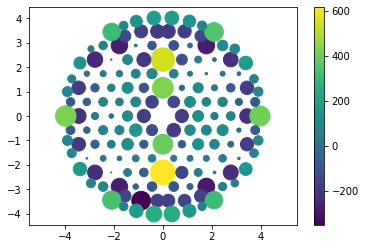

In [38]:
plt.scatter(xact, yact, abs(fzd), fzd)
plt.colorbar()
plt.axis('equal');
#plt.plot(fzd)

In [39]:
sum(fzd)

2932.760725942719

In [45]:
print('%.2f , %.2f\n' %(df['zForces0'][0], df['zForces1'][0]))

580.42 , 964.05



In [46]:
dr

,ID,Coefficient 5,Coefficient 4,Coefficient 3,Coefficient 2,Coefficient 1,Coefficient 0
0,101,-7.000000e-09,0.000004,-0.000029,-0.113873,-0.023289,751.671180
1,102,-8.000000e-09,0.000004,-0.000031,-0.127973,-0.042643,844.737946
2,103,-9.000000e-09,0.000005,-0.000037,-0.150689,-0.041929,994.683985
3,104,-1.100000e-08,0.000006,-0.000046,-0.179332,-0.019597,1183.759913
4,105,-1.300000e-08,0.000007,-0.000055,-0.208742,0.009414,1377.906025
...,...,...,...,...,...,...,...
151,439,-1.200000e-08,0.000004,0.000294,-0.139028,-6.304943,916.143662
152,440,-1.400000e-08,0.000004,0.000430,-0.147472,-8.928146,971.227981
153,441,-1.400000e-08,0.000004,0.000467,-0.150051,-9.657882,988.073176
154,442,-1.400000e-08,0.000004,0.000460,-0.149881,-9.512153,986.986855
